<a href="https://colab.research.google.com/github/samuelj1323/ML_Learning/blob/main/Multi_class_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

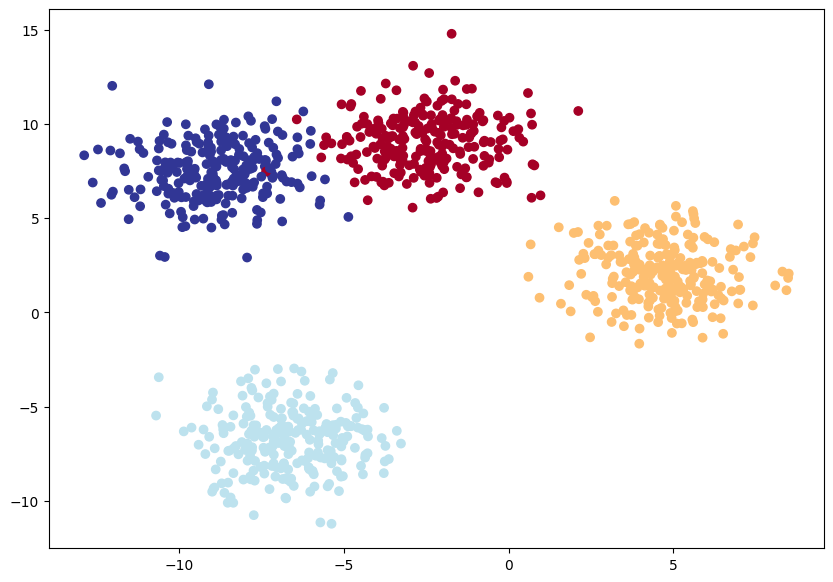

In [1]:
#Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Create mulit-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            ) #Give them a. little shakeup
#Turn Data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#Split train_test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)


#Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)






### Building a multi-clas classification model in pytorch

In [2]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
#Build muit=class classification
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classiciation model.
    Args:
      input_features (int): Number of input features to the model
      output_featrues (int): Number of outputs features (number of output classes)
      hidden_unit (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)



In [4]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [5]:
#Create an instance of blobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8
                    ).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create. a loss function and an optimizer for a multi-class problem

In [6]:
#Create a loss function for multi-class classification - how wrong model is
loss_fn = nn.CrossEntropyLoss()
#Create an optimizer for multi-class classification - updates params, to reduce loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.05)


#Getting prediction probabilities for a multi-class pyorch model

In order to evaluate and train and test our model, we need to convert out model's outputs (logits) to prediction probabilities and then to prediction labels

Logits (raw output of model) -> pred probs (use torch.softmax) -> Pred labels (take the argmax of the prediction probabilities)


In [7]:
#Lets get some raw ouputs of our model: Logits
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_blob_test.to(device))
y_logits = y_preds
y_logits[:10]

tensor([[ 1.5472e-04, -7.6249e-02,  5.6209e-01, -5.2655e-01],
        [ 2.2586e+00,  5.5295e-01,  1.9221e+00, -1.7806e+00],
        [-3.2466e-01, -3.1743e-01,  1.7709e-01, -1.4290e-01],
        [-8.7383e-02,  4.7457e-02,  1.6265e-01, -4.3296e-01],
        [ 1.6552e+00,  4.6712e-01,  1.9290e+00, -1.4805e+00],
        [ 2.6704e+00,  7.0161e-01,  2.1510e+00, -2.0198e+00],
        [-3.1370e-01, -2.8214e-01,  1.8927e-01, -1.5928e-01],
        [ 1.7678e+00,  4.7402e-01,  1.9269e+00, -1.5227e+00],
        [-3.4723e-01, -3.9006e-01,  1.5200e-01, -1.0917e-01],
        [ 1.6917e+00,  4.5209e-01,  1.9046e+00, -1.4834e+00]])

###To get the logits to probabilities, you need to use an activation function
 (sigmoid for binary, etc.)
 (softmas for multi)

In [8]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.2341, 0.2169, 0.4107, 0.1383],
        [0.5226, 0.0949, 0.3733, 0.0092],
        [0.2058, 0.2073, 0.3400, 0.2469],
        [0.2418, 0.2767, 0.3104, 0.1711],
        [0.3755, 0.1144, 0.4938, 0.0163],
        [0.5735, 0.0801, 0.3412, 0.0053],
        [0.2061, 0.2127, 0.3408, 0.2405],
        [0.4026, 0.1104, 0.4720, 0.0150],
        [0.2052, 0.1966, 0.3380, 0.2603],
        [0.3893, 0.1127, 0.4817, 0.0163]])

In [9]:
#Arg max give index value, max gives highest value
torch.argmax(y_pred_probs[0])

tensor(2)

In [10]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [11]:
y_blob_train.dtype

torch.int64

In [12]:
y_logits.dtype

torch.float32

### Create a training loop and testing loop for a multi-class Pytorch Model

In [13]:
#Fit the multi=class model to teh data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#Set num of epochs
epochs = 1000
#Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#Loop through data
for epoch in range(epochs):
  #Training mode on
  model_4.train()
  #Do the forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  # get the loss
  loss = loss_fn(y_logits, y_blob_train)
  #acc = accuracy_fn(y_train=y_blob_train, y_pred=y_pred)
  #optimizer step
  optimizer.zero_grad()
  #back propagation on the loss
  loss.backward()
  #update the params of our params
  optimizer.step()

  #testing mode
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    # Test acc

    #Print out what's happenning
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")


Epoch: 0 | Loss: 2.0326 | Test loss: 1.7961
Epoch: 100 | Loss: 0.0592 | Test loss: 0.0523
Epoch: 200 | Loss: 0.0358 | Test loss: 0.0269
Epoch: 300 | Loss: 0.0311 | Test loss: 0.0214
Epoch: 400 | Loss: 0.0292 | Test loss: 0.0191
Epoch: 500 | Loss: 0.0282 | Test loss: 0.0178
Epoch: 600 | Loss: 0.0266 | Test loss: 0.0167
Epoch: 700 | Loss: 0.0256 | Test loss: 0.0161
Epoch: 800 | Loss: 0.0250 | Test loss: 0.0155
Epoch: 900 | Loss: 0.0246 | Test loss: 0.0150


##9. a few more classification metrics: (To eval our class model)

* Accuracy - Out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* classification report

In [14]:
!pip install torchmetrics

In [15]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.2850)

 ### EXERCISES AND EXTRA CURRICULUM:

In [16]:
import torch
#Set up device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_SEED = 42
NUM_SAMPLES = 1000

In [17]:
from sklearn.datasets import make_moons
# Create teh data set with make_moons
X, y = make_moons(n_samples=NUM_SAMPLES, noise=0.07, random_state=RANDOM_SEED)
X[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [18]:
X.shape, y.shape, X.dtype, y.dtype

((1000, 2), (1000,), dtype('float64'), dtype('int64'))

In [19]:
X[:,0].shape, X[:,1].shape, y.shape

((1000,), (1000,), (1000,))

In [20]:
import pandas as pd
#Convert data into a df

data_df = pd.DataFrame({
    "X0": X[:,0],
    "X1": X[:,1],
    "y": y
})
data_df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


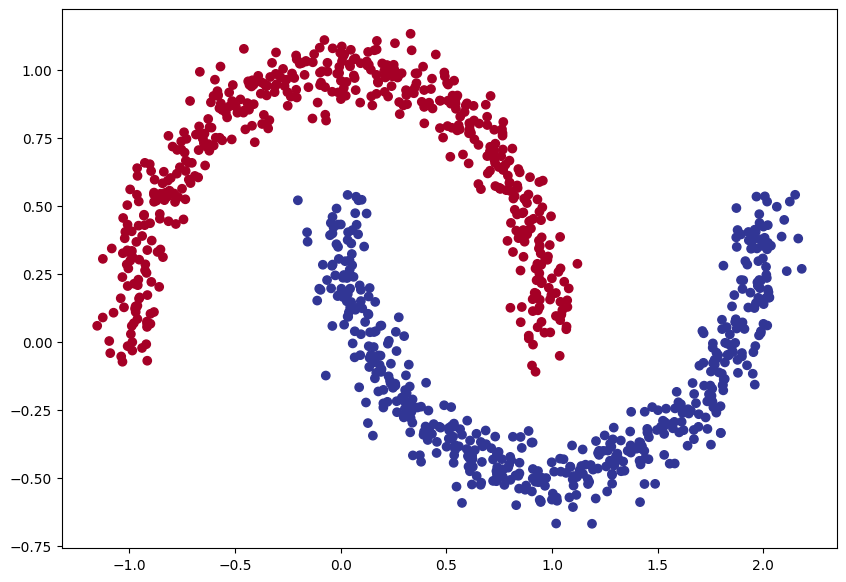

In [21]:
import matplotlib.pyplot as plt
#visualize the data on a scatter plot
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [71]:
#Turn the data into tensors of dtype float
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
#Split the data into train and test sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=RANDOM_SEED)

len(X_train), len(X_test), len(y_train), len(y_test), X.dtype, y.dtype

<ipython-input-71-feafdc1c40de>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)
<ipython-input-71-feafdc1c40de>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


(800, 200, 800, 200, torch.float32, torch.float32)

##Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

In [72]:
import torch
from torch import nn

class MoonModelV0(nn.Module):
  def __init__(self, in_feats, out_feats, hidden_feats):
    super().__init__()
    self.stacked_layers = nn.Sequential(
        nn.Linear(in_features=in_feats, out_features=hidden_feats),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feats, out_features=hidden_feats),
        nn.ReLU(),
        nn.Linear(in_features=hidden_feats, out_features=out_feats)
    )
  def forward(self, x):
    return self.stacked_layers(x)
model_0 = MoonModelV0(in_feats=2, out_feats=1, hidden_feats=10).to(device)
model_0

MoonModelV0(
  (stacked_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [73]:
loss_fn = nn.BCELoss() # sigmoid layer built-in
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of model to optimize
                            lr=0.1) # learning rate

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [26]:
torch.sigmoid(test_logits).shape

torch.Size([200, 4])

In [80]:
epochs = 1000
for epoch in range(epochs):
  #Training mode on
  model_0.train()
  # forward pass
  pred_logits = model_0(X_train).squeeze()
  pred_probs = torch.sigmoid(pred_logits)
  #Calculate the loss
  loss = loss_fn(pred_probs, y_train)
  #Optimizer zero grad
  optimizer.zero_grad()
  #loss back propagation
  loss.backward()
  #optimizer step
  optimizer.step()
  #Test loop:
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred_probs = torch.sigmoid(test_logits)
    #Calculate the loss
    test_loss = loss_fn(test_pred_probs, y_test)
    if epoch % 100 == 0:
      print(f" epch: {epoch} | train_loss: {loss} | test_loss: {test_loss}")


 epch: 0 | train_loss: 0.5758649706840515 | test_loss: 0.5749738216400146
 epch: 100 | train_loss: 0.2507064938545227 | test_loss: 0.25064656138420105
 epch: 200 | train_loss: 0.21230018138885498 | test_loss: 0.20445631444454193
 epch: 300 | train_loss: 0.18042930960655212 | test_loss: 0.17112992703914642
 epch: 400 | train_loss: 0.1385328620672226 | test_loss: 0.1288800686597824
 epch: 500 | train_loss: 0.0940583124756813 | test_loss: 0.08457167446613312
 epch: 600 | train_loss: 0.06186595931649208 | test_loss: 0.05355770140886307
 epch: 700 | train_loss: 0.0426543653011322 | test_loss: 0.03574853762984276
 epch: 800 | train_loss: 0.031331103295087814 | test_loss: 0.025518985465168953
 epch: 900 | train_loss: 0.02429795265197754 | test_loss: 0.019310908392071724


In [83]:
pred_probs[:10], y_train[:10]

(tensor([9.9710e-01, 7.3087e-04, 1.8584e-02, 3.4688e-02, 9.9794e-01, 5.7014e-02,
         9.9622e-01, 9.9498e-01, 4.9896e-04, 6.6718e-03],
        grad_fn=<SliceBackward0>),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.]))

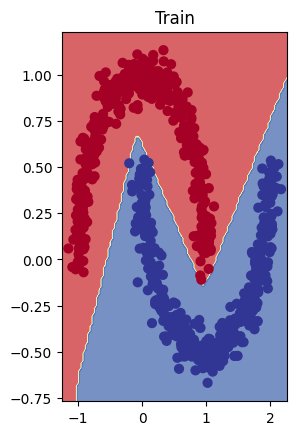

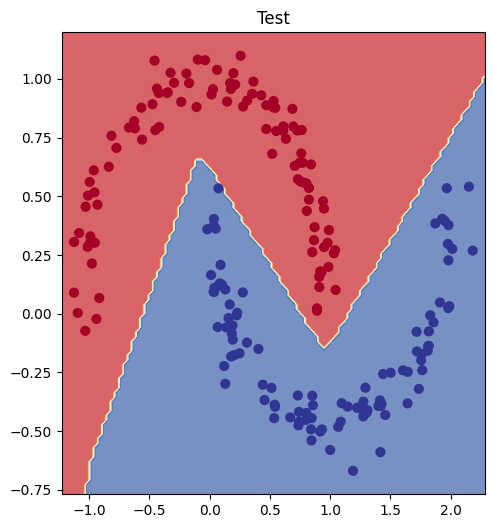

<Figure size 1200x600 with 0 Axes>

In [81]:
import numpy as np
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [32]:
model_0.state_dict()

OrderedDict([('stacked_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('stacked_layers.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('stacked_layers.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2

In [28]:
model_0(X_train).squeeze().shape

torch.Size([800])

In [29]:
torch.sigmoid(model_0(X_train).squeeze())[:10]

tensor([0.5005, 0.5024, 0.5040, 0.5046, 0.5071, 0.5048, 0.5073, 0.5049, 0.5065,
        0.5020], grad_fn=<SliceBackward0>)

In [30]:
torch.round(torch.sigmoid(model_0(X_train).squeeze())[:10])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)

##6. Replicate the Tanh activation fn w/ pure pytorch.

In [88]:
straight_line = torch.arange(-100,100,1)
straight_line

tensor([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,  -89,
         -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,
         -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,
         -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,  -53,
         -52,  -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,
         -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,  -29,
         -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,  -18,  -17,
         -16,  -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,
          -4,   -3,   -2,   -1,    0,    1,    2,    3,    4,    5,    6,    7,
           8,    9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
          32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   

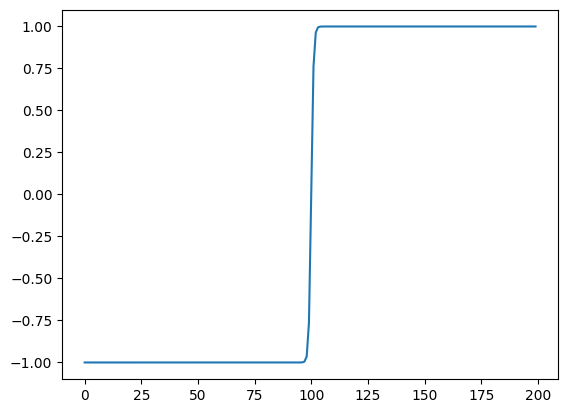

In [89]:
tensor_a = torch.tanh(straight_line)
plt.plot(tensor_a)

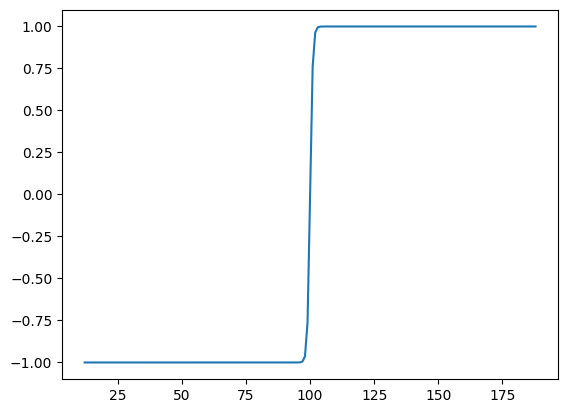

In [92]:
def tanh(z):
  return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))
plt.plot(tanh(straight_line))